# Student Performance Data Analysis

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
df = pd.read_csv("C:/Users/hasna/OneDrive/Desktop/python/datasheets/Student_performance_data _.csv")

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


## Data Preprocessing and Cleaning

In [5]:
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [32]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [9]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Statistical Analysis

In [14]:
df["GradeClass"].unique()

array([2., 1., 4., 3., 0.])

In [16]:
print("No of Rows: ",df.shape[0])

No of Rows:  2392


In [17]:
print("No of Columns: ", df.shape[1])

No of Columns:  15


In [18]:
print("Min age: ", df["Age"].min())

Min age:  15


In [19]:
print("Max age: ", df["Age"].max())

Max age:  18


In [22]:
print("Average age: ", df["Age"].mean().round(2))

Average age:  16.47


In [23]:
print("No of Males: ", df["Gender"].sum())

No of Males:  1222


In [24]:
print("No of Females: ", df["Gender"].count() - df["Gender"].sum())

No of Females:  1170


In [35]:
print("Mean Studying time:", round(df["StudyTimeWeekly"].mean(), 2), "Hours")

Mean Studying time: 9.77 Hours


In [36]:
print("No of students have Tutoring:", df["Tutoring"].sum())

No of students have Tutoring: 721


In [37]:
print("No of Students doing Extracurricular:", df["Extracurricular"].sum())

No of Students doing Extracurricular: 917


In [38]:
print("No of Student doing Sports:", df["Sports"].sum())

No of Student doing Sports: 726


In [39]:
print("No of Students doing Music:", df["Music"].sum())

No of Students doing Music: 471


In [42]:
print("Average GPA:", df["GPA"].mean().round(2))

Average GPA: 1.91


In [43]:
print("Max GPA:", df["GPA"].max())

Max GPA: 4.0


## Correlation Analysis

In [95]:
numerical_data = df.select_dtypes(include=["number"])
corr_matrix = numerical_data.corr(method="pearson")
corr_matrix

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


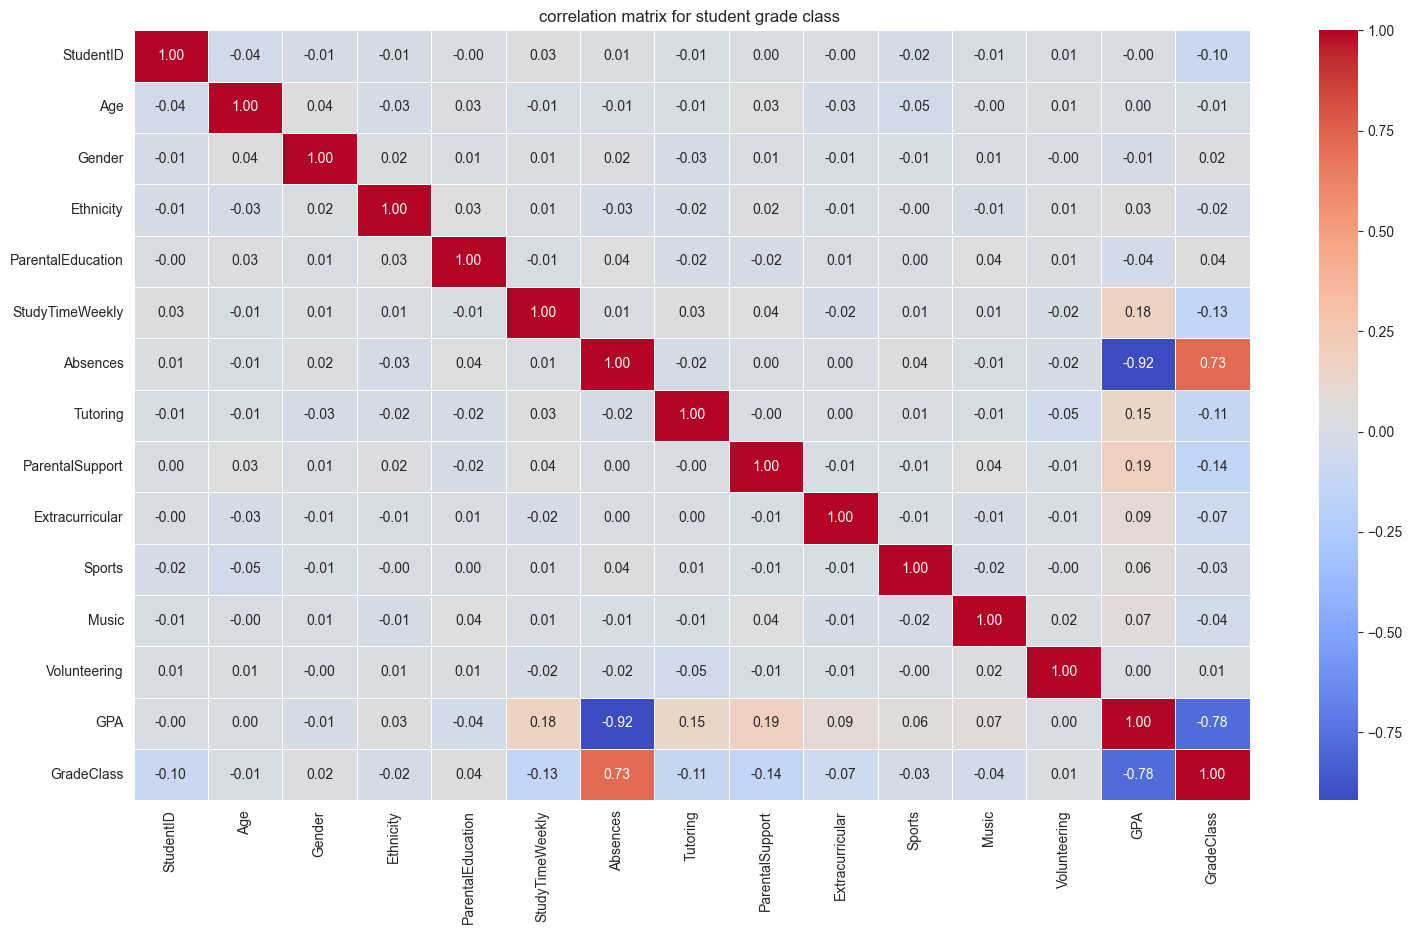

In [99]:
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",linewidths=0.7,fmt=".2f")
plt.title("correlation matrix for student grade class ")
plt.show()

## Visualization 

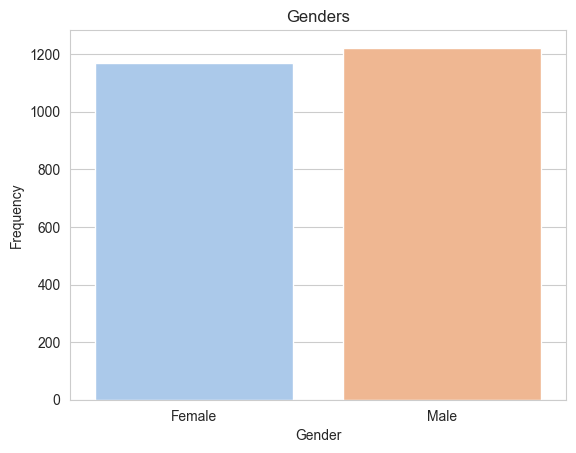

In [67]:
ax = sns.countplot(x="Gender", data=df, palette="pastel")
ax.set_xticklabels(['Female', 'Male'])
plt.title("Genders")
plt.ylabel("Frequency")
plt.show()

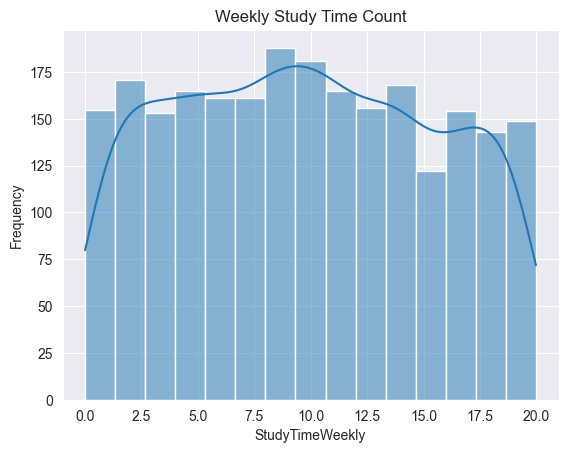

In [69]:
sns.histplot(x="StudyTimeWeekly", data=df, palette="pastel", kde=True)
plt.ylabel("Frequency")
plt.title("Weekly Study Time Count")
plt.show()

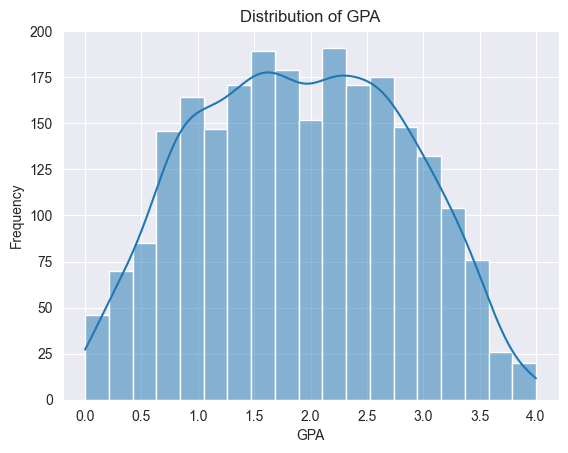

In [71]:
sns.histplot(x="GPA", data=df, palette="pastel", kde=True)
plt.ylabel("Frequency")
plt.title("Distribution of GPA")
plt.show()

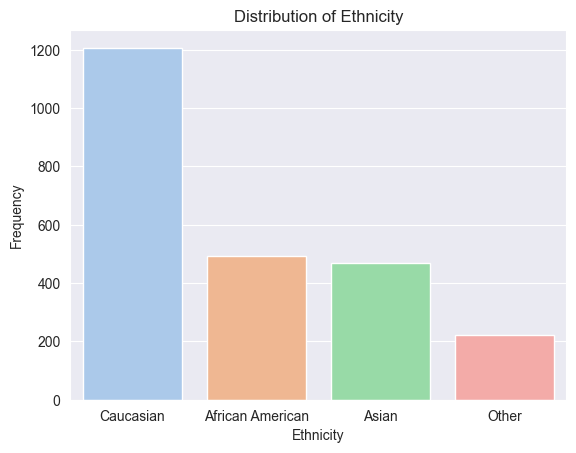

In [75]:
ax = sns.countplot(x="Ethnicity", data=df, palette="pastel")
plt.ylabel("Frequency")
plt.title("Distribution of Ethnicity")
ax.set_xticklabels(['Caucasian', 'African American','Asian','Other'])
plt.show()

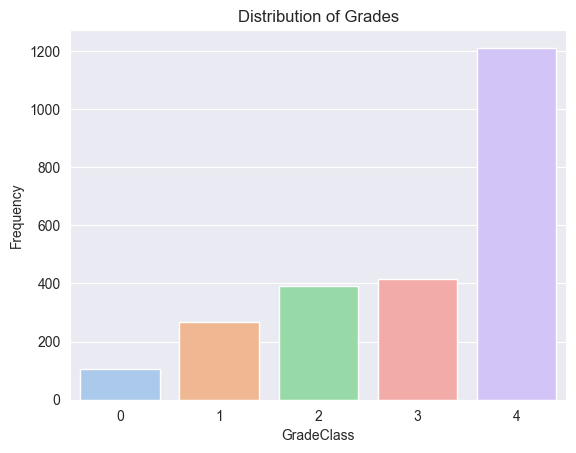

In [78]:
ax = sns.countplot(x="GradeClass", data=df, palette="pastel")
plt.ylabel("Frequency")
plt.title("Distribution of Grades")
ax.set_xticklabels([0,1,2,3,4])
plt.show()

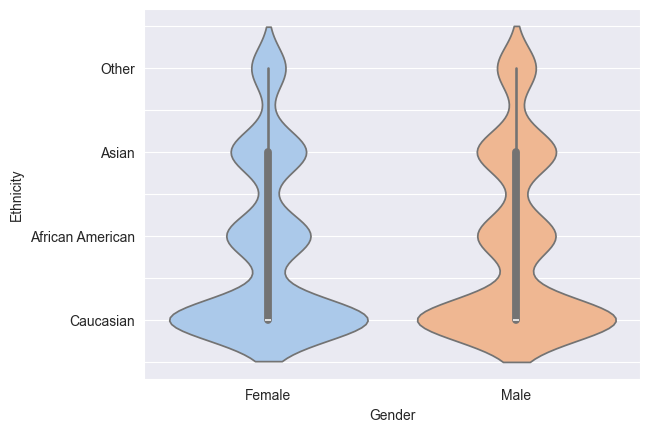

In [86]:
ax=sns.violinplot(data=df,x="Gender",y="Ethnicity", palette="pastel")
ax.set_xticklabels(['Female', 'Male'])
ax.set_yticklabels([' ',' ','Caucasian',' ', 'African American',' ', 'Asian',' ','Other'])
plt.show()

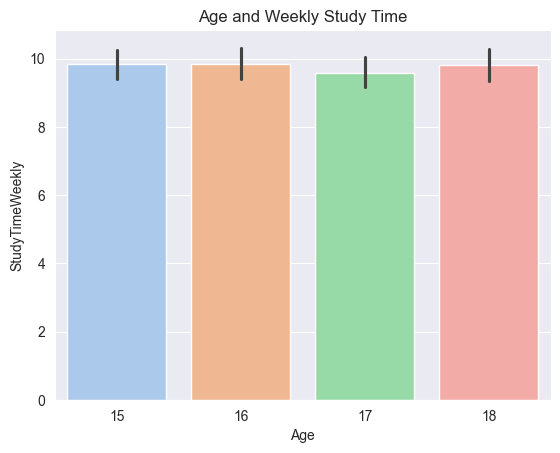

In [88]:
sns.barplot(x="Age", y="StudyTimeWeekly", data=df, palette="pastel")
plt.title("Age and Weekly Study Time")
plt.show()

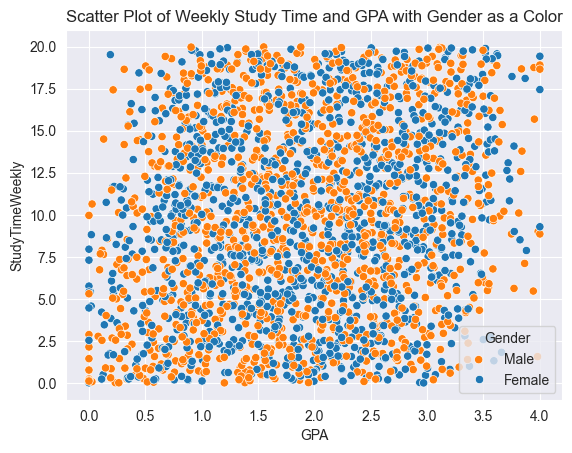

In [94]:
sns.scatterplot(data=df,x="GPA",y="StudyTimeWeekly", hue="Gender")
plt.title("Scatter Plot of Weekly Study Time and GPA with Gender as a Color")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()

## Preprocessing and Splitting Data

In [103]:
X = df.drop(["StudentID","GradeClass"],axis = 1)
y = df["GradeClass"]

In [107]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=69,stratify=y)

## Model Training

In [131]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

model = xgb.XGBRFClassifier()

model.fit(X_train, y_train)
pred = model.predict(X_test)
print("The Accuracy Score is", accuracy_score(pred, y_test).round(2) * 100, "%")

The Accuracy Score is 93.0 %


<Axes: >

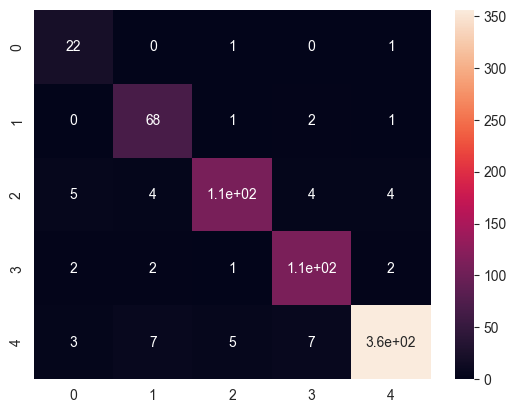

In [132]:
cm=confusion_matrix(pred,y_test)
sns.heatmap(cm ,annot=True)